In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda')

In [13]:
epochs = 200
batch_size = 16
learning_rate = 0.003


In [14]:
# https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)


In [15]:
train_dataset = datasets.CIFAR10(
    root='data/', train=True, download=True, transform=transform)
train_loader = data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.CIFAR10(
    root='data', train=False, download=True, transform=transform)
test_loader = data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True)


Files already downloaded and verified
Files already downloaded and verified


In [16]:
classes = ['car', 'plane', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

print(len(train_loader))
print(len(test_loader))


3125
625


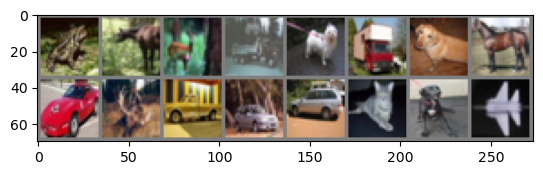

torch.Size([16, 3, 32, 32])
After conv1:  torch.Size([16, 6, 28, 28])
After pool1:  torch.Size([16, 6, 14, 14])
After conv2:  torch.Size([16, 16, 10, 10])
After pool2:  torch.Size([16, 16, 5, 5])


In [17]:
# test

def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


data_iter = iter(train_loader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images))

conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)

x = conv1(images)
print("After conv1: ", x.shape)

x = pool(x)
print("After pool1: ", x.shape)

x = conv2(x)
print("After conv2: ", x.shape)

x = pool(x)
print("After pool2: ", x.shape)


In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)  # flatten tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [19]:
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


  0%|          | 1/200 [00:19<1:03:19, 19.09s/it]

Epoch: 1 Loss: 2.277501344680786


  1%|          | 2/200 [00:38<1:04:20, 19.50s/it]

Epoch: 2 Loss: 1.7196342945098877


  2%|▏         | 3/200 [00:58<1:04:45, 19.72s/it]

Epoch: 3 Loss: 1.9325135946273804


  2%|▏         | 4/200 [01:18<1:03:56, 19.57s/it]

Epoch: 4 Loss: 1.5234532356262207


  2%|▎         | 5/200 [01:37<1:03:16, 19.47s/it]

Epoch: 5 Loss: 1.384553074836731


  3%|▎         | 6/200 [01:57<1:03:30, 19.64s/it]

Epoch: 6 Loss: 1.6136157512664795


  4%|▎         | 7/200 [02:16<1:02:57, 19.57s/it]

Epoch: 7 Loss: 1.1259136199951172


  4%|▍         | 8/200 [02:36<1:02:26, 19.51s/it]

Epoch: 8 Loss: 1.3958404064178467


  4%|▍         | 9/200 [02:56<1:02:27, 19.62s/it]

Epoch: 9 Loss: 1.2908098697662354


  5%|▌         | 10/200 [03:15<1:01:50, 19.53s/it]

Epoch: 10 Loss: 1.338710904121399


  6%|▌         | 11/200 [03:34<1:01:01, 19.37s/it]

Epoch: 11 Loss: 1.177196979522705


  6%|▌         | 12/200 [03:54<1:01:24, 19.60s/it]

Epoch: 12 Loss: 1.0838056802749634


  6%|▋         | 13/200 [04:14<1:01:02, 19.59s/it]

Epoch: 13 Loss: 1.5847805738449097


  7%|▋         | 14/200 [04:32<59:58, 19.35s/it]  

Epoch: 14 Loss: 1.173674464225769


  8%|▊         | 15/200 [04:53<1:00:28, 19.61s/it]

Epoch: 15 Loss: 1.0626697540283203


  8%|▊         | 16/200 [05:12<59:54, 19.53s/it]  

Epoch: 16 Loss: 1.4252197742462158


  8%|▊         | 17/200 [05:31<59:26, 19.49s/it]

Epoch: 17 Loss: 1.6227145195007324


  9%|▉         | 18/200 [05:52<59:47, 19.71s/it]

Epoch: 18 Loss: 0.7436087131500244


 10%|▉         | 19/200 [06:11<59:05, 19.59s/it]

Epoch: 19 Loss: 0.7329229712486267


 10%|█         | 20/200 [06:30<58:28, 19.49s/it]

Epoch: 20 Loss: 0.4741517901420593


 10%|█         | 21/200 [06:51<58:56, 19.76s/it]

Epoch: 21 Loss: 1.1153593063354492


 11%|█         | 22/200 [07:10<58:22, 19.67s/it]

Epoch: 22 Loss: 0.8202536702156067


 12%|█▏        | 23/200 [07:29<57:32, 19.51s/it]

Epoch: 23 Loss: 1.1301640272140503


 12%|█▏        | 24/200 [07:49<57:50, 19.72s/it]

Epoch: 24 Loss: 0.9169274568557739


 12%|█▎        | 25/200 [08:10<58:03, 19.90s/it]

Epoch: 25 Loss: 1.1480544805526733


 13%|█▎        | 26/200 [08:29<57:03, 19.67s/it]

Epoch: 26 Loss: 0.9425750374794006


 14%|█▎        | 27/200 [08:49<56:58, 19.76s/it]

Epoch: 27 Loss: 1.1296223402023315


 14%|█▍        | 28/200 [09:09<56:42, 19.78s/it]

Epoch: 28 Loss: 0.5294576287269592


 14%|█▍        | 29/200 [09:28<55:54, 19.62s/it]

Epoch: 29 Loss: 0.5992166996002197


 15%|█▌        | 30/200 [09:48<55:33, 19.61s/it]

Epoch: 30 Loss: 0.5840438604354858


 16%|█▌        | 31/200 [10:08<55:36, 19.74s/it]

Epoch: 31 Loss: 0.5936804413795471


 16%|█▌        | 32/200 [10:26<54:15, 19.38s/it]

Epoch: 32 Loss: 1.192113995552063


 16%|█▋        | 33/200 [10:46<54:16, 19.50s/it]

Epoch: 33 Loss: 1.1341869831085205


 17%|█▋        | 34/200 [11:06<54:22, 19.65s/it]

Epoch: 34 Loss: 0.45294705033302307


 18%|█▊        | 35/200 [11:25<53:17, 19.38s/it]

Epoch: 35 Loss: 0.7333652973175049


 18%|█▊        | 36/200 [11:45<53:26, 19.55s/it]

Epoch: 36 Loss: 0.42275938391685486


 18%|█▊        | 37/200 [12:04<53:05, 19.54s/it]

Epoch: 37 Loss: 0.7572550773620605


 19%|█▉        | 38/200 [12:24<52:41, 19.52s/it]

Epoch: 38 Loss: 0.7194287776947021


 20%|█▉        | 39/200 [12:43<52:41, 19.63s/it]

Epoch: 39 Loss: 0.3792472779750824


 20%|██        | 40/200 [13:03<52:26, 19.67s/it]

Epoch: 40 Loss: 0.4228493273258209


 20%|██        | 41/200 [13:23<51:50, 19.56s/it]

Epoch: 41 Loss: 1.2134106159210205


 21%|██        | 42/200 [13:42<51:24, 19.52s/it]

Epoch: 42 Loss: 0.5524159073829651


 22%|██▏       | 43/200 [14:02<51:14, 19.58s/it]

Epoch: 43 Loss: 0.7825126051902771


 22%|██▏       | 44/200 [14:21<50:49, 19.55s/it]

Epoch: 44 Loss: 0.6441081166267395


 22%|██▎       | 45/200 [14:41<50:44, 19.64s/it]

Epoch: 45 Loss: 0.33043143153190613


 23%|██▎       | 46/200 [15:01<51:03, 19.89s/it]

Epoch: 46 Loss: 0.936934769153595


 24%|██▎       | 47/200 [15:21<50:12, 19.69s/it]

Epoch: 47 Loss: 0.5255116820335388


 24%|██▍       | 48/200 [15:40<49:37, 19.59s/it]

Epoch: 48 Loss: 0.19122707843780518


 24%|██▍       | 49/200 [16:01<49:58, 19.86s/it]

Epoch: 49 Loss: 0.4482707977294922


 25%|██▌       | 50/200 [16:20<49:27, 19.78s/it]

Epoch: 50 Loss: 0.8156039714813232


 26%|██▌       | 51/200 [16:39<48:28, 19.52s/it]

Epoch: 51 Loss: 0.2731718420982361


 26%|██▌       | 52/200 [16:59<48:43, 19.76s/it]

Epoch: 52 Loss: 0.43893128633499146


 26%|██▋       | 53/200 [17:18<47:55, 19.56s/it]

Epoch: 53 Loss: 0.1950254589319229


 27%|██▋       | 54/200 [17:38<47:49, 19.65s/it]

Epoch: 54 Loss: 0.6762766242027283


 28%|██▊       | 55/200 [17:59<48:00, 19.86s/it]

Epoch: 55 Loss: 0.4855581820011139


 28%|██▊       | 56/200 [18:17<46:54, 19.54s/it]

Epoch: 56 Loss: 0.4946307837963104


 28%|██▊       | 57/200 [18:37<46:41, 19.59s/it]

Epoch: 57 Loss: 0.260982871055603


 29%|██▉       | 58/200 [18:57<46:43, 19.74s/it]

Epoch: 58 Loss: 0.5329303741455078


 30%|██▉       | 59/200 [19:16<45:59, 19.57s/it]

Epoch: 59 Loss: 0.16959649324417114


 30%|███       | 60/200 [19:36<45:51, 19.65s/it]

Epoch: 60 Loss: 0.6016585230827332


 30%|███       | 61/200 [19:56<45:38, 19.70s/it]

Epoch: 61 Loss: 0.8891763687133789


 31%|███       | 62/200 [20:16<45:10, 19.64s/it]

Epoch: 62 Loss: 0.38827231526374817


 32%|███▏      | 63/200 [20:35<44:37, 19.54s/it]

Epoch: 63 Loss: 0.679422914981842


 32%|███▏      | 64/200 [20:55<44:26, 19.61s/it]

Epoch: 64 Loss: 0.22977162897586823


 32%|███▎      | 65/200 [21:14<43:56, 19.53s/it]

Epoch: 65 Loss: 0.6686428785324097


 33%|███▎      | 66/200 [21:33<43:11, 19.34s/it]

Epoch: 66 Loss: 0.2752317786216736


 34%|███▎      | 67/200 [21:53<43:25, 19.59s/it]

Epoch: 67 Loss: 0.40265563130378723


 34%|███▍      | 68/200 [22:13<43:11, 19.64s/it]

Epoch: 68 Loss: 0.48382440209388733


 34%|███▍      | 69/200 [22:32<42:17, 19.37s/it]

Epoch: 69 Loss: 0.453511118888855


 35%|███▌      | 70/200 [22:51<41:59, 19.38s/it]

Epoch: 70 Loss: 0.3229564130306244


 36%|███▌      | 71/200 [23:11<41:56, 19.51s/it]

Epoch: 71 Loss: 0.4973927140235901


 36%|███▌      | 72/200 [23:30<41:16, 19.35s/it]

Epoch: 72 Loss: 0.3220197856426239


 36%|███▋      | 73/200 [23:49<41:02, 19.39s/it]

Epoch: 73 Loss: 0.07096723467111588


 37%|███▋      | 74/200 [24:08<40:20, 19.21s/it]

Epoch: 74 Loss: 0.11262020468711853


 38%|███▊      | 75/200 [24:27<40:04, 19.23s/it]

Epoch: 75 Loss: 0.3560032546520233


 38%|███▊      | 76/200 [24:47<39:51, 19.29s/it]

Epoch: 76 Loss: 0.19391053915023804


 38%|███▊      | 77/200 [25:06<39:30, 19.27s/it]

Epoch: 77 Loss: 0.3853348195552826


 39%|███▉      | 78/200 [25:25<39:19, 19.34s/it]

Epoch: 78 Loss: 0.3900408148765564


 40%|███▉      | 79/200 [25:44<38:42, 19.19s/it]

Epoch: 79 Loss: 0.4466176927089691


 40%|████      | 80/200 [26:04<38:35, 19.30s/it]

Epoch: 80 Loss: 0.662613034248352


 40%|████      | 81/200 [26:23<38:14, 19.28s/it]

Epoch: 81 Loss: 0.2972838282585144


 41%|████      | 82/200 [26:42<37:48, 19.22s/it]

Epoch: 82 Loss: 0.4252339005470276


 42%|████▏     | 83/200 [27:02<37:46, 19.37s/it]

Epoch: 83 Loss: 0.6230283379554749


 42%|████▏     | 84/200 [27:21<37:14, 19.26s/it]

Epoch: 84 Loss: 0.20478160679340363


 42%|████▎     | 85/200 [27:40<36:58, 19.29s/it]

Epoch: 85 Loss: 0.10087315738201141


 43%|████▎     | 86/200 [28:00<36:50, 19.39s/it]

Epoch: 86 Loss: 0.20415914058685303


 44%|████▎     | 87/200 [28:19<36:20, 19.30s/it]

Epoch: 87 Loss: 0.10059456527233124


 44%|████▍     | 88/200 [28:38<36:06, 19.34s/it]

Epoch: 88 Loss: 0.12127558141946793


 44%|████▍     | 89/200 [28:58<35:49, 19.36s/it]

Epoch: 89 Loss: 0.5524286031723022


 45%|████▌     | 90/200 [29:17<35:35, 19.41s/it]

Epoch: 90 Loss: 0.15766267478466034


 46%|████▌     | 91/200 [29:37<35:33, 19.57s/it]

Epoch: 91 Loss: 0.3081040680408478


 46%|████▌     | 92/200 [29:57<35:15, 19.59s/it]

Epoch: 92 Loss: 0.2609562873840332


 46%|████▋     | 93/200 [30:17<35:11, 19.74s/it]

Epoch: 93 Loss: 0.1537039428949356


 47%|████▋     | 94/200 [30:37<34:49, 19.71s/it]

Epoch: 94 Loss: 0.24027115106582642


 48%|████▊     | 95/200 [30:56<34:19, 19.61s/it]

Epoch: 95 Loss: 0.4244476854801178


 48%|████▊     | 96/200 [31:16<34:04, 19.66s/it]

Epoch: 96 Loss: 0.2939319610595703


 48%|████▊     | 97/200 [31:35<33:28, 19.50s/it]

Epoch: 97 Loss: 0.15867197513580322


 49%|████▉     | 98/200 [31:55<33:24, 19.65s/it]

Epoch: 98 Loss: 0.8305913805961609


 50%|████▉     | 99/200 [32:14<32:54, 19.55s/it]

Epoch: 99 Loss: 0.7752271890640259


 50%|█████     | 100/200 [32:33<32:14, 19.35s/it]

Epoch: 100 Loss: 0.07697352021932602


 50%|█████     | 101/200 [32:52<31:53, 19.33s/it]

Epoch: 101 Loss: 0.25546810030937195


 51%|█████     | 102/200 [33:12<31:35, 19.34s/it]

Epoch: 102 Loss: 0.18598313629627228


 52%|█████▏    | 103/200 [33:31<30:59, 19.17s/it]

Epoch: 103 Loss: 0.029611431062221527


 52%|█████▏    | 104/200 [33:50<30:57, 19.35s/it]

Epoch: 104 Loss: 0.21286539733409882


 52%|█████▎    | 105/200 [34:10<30:35, 19.32s/it]

Epoch: 105 Loss: 0.08222818374633789


 53%|█████▎    | 106/200 [34:29<30:21, 19.38s/it]

Epoch: 106 Loss: 0.3958997130393982


 54%|█████▎    | 107/200 [34:48<30:01, 19.37s/it]

Epoch: 107 Loss: 0.2487277388572693


 54%|█████▍    | 108/200 [35:08<29:43, 19.39s/it]

Epoch: 108 Loss: 0.125855952501297


 55%|█████▍    | 109/200 [35:28<29:40, 19.56s/it]

Epoch: 109 Loss: 0.12775692343711853


 55%|█████▌    | 110/200 [35:47<29:03, 19.37s/it]

Epoch: 110 Loss: 0.31413090229034424


 56%|█████▌    | 111/200 [36:07<28:57, 19.52s/it]

Epoch: 111 Loss: 0.03677455708384514


 56%|█████▌    | 112/200 [36:26<28:37, 19.52s/it]

Epoch: 112 Loss: 0.1718595176935196


 56%|█████▋    | 113/200 [36:45<28:00, 19.32s/it]

Epoch: 113 Loss: 0.2357875108718872


 57%|█████▋    | 114/200 [37:05<27:49, 19.41s/it]

Epoch: 114 Loss: 0.10694068670272827


 57%|█████▊    | 115/200 [37:24<27:27, 19.38s/it]

Epoch: 115 Loss: 0.2277011126279831


 58%|█████▊    | 116/200 [37:43<27:08, 19.39s/it]

Epoch: 116 Loss: 0.4743937849998474


 58%|█████▊    | 117/200 [38:04<27:08, 19.62s/it]

Epoch: 117 Loss: 0.28654244542121887


 59%|█████▉    | 118/200 [38:23<26:42, 19.55s/it]

Epoch: 118 Loss: 0.32412201166152954


 60%|█████▉    | 119/200 [38:43<26:28, 19.62s/it]

Epoch: 119 Loss: 0.10421179234981537


 60%|██████    | 120/200 [39:03<26:14, 19.68s/it]

Epoch: 120 Loss: 0.15919852256774902


 60%|██████    | 121/200 [39:22<25:41, 19.52s/it]

Epoch: 121 Loss: 0.5232999920845032


 61%|██████    | 122/200 [39:41<25:28, 19.59s/it]

Epoch: 122 Loss: 0.26361384987831116


 62%|██████▏   | 123/200 [40:01<25:03, 19.53s/it]

Epoch: 123 Loss: 0.038631416857242584


 62%|██████▏   | 124/200 [40:21<24:54, 19.67s/it]

Epoch: 124 Loss: 0.08720292150974274


 62%|██████▎   | 125/200 [40:41<24:43, 19.78s/it]

Epoch: 125 Loss: 0.09721674025058746


 63%|██████▎   | 126/200 [41:00<24:11, 19.61s/it]

Epoch: 126 Loss: 0.19353413581848145


 64%|██████▎   | 127/200 [41:20<23:50, 19.59s/it]

Epoch: 127 Loss: 0.18416129052639008


 64%|██████▍   | 128/200 [41:39<23:17, 19.41s/it]

Epoch: 128 Loss: 0.22104087471961975


 64%|██████▍   | 129/200 [41:58<22:56, 19.38s/it]

Epoch: 129 Loss: 0.5661112070083618


 65%|██████▌   | 130/200 [42:17<22:38, 19.41s/it]

Epoch: 130 Loss: 0.1509212702512741


 66%|██████▌   | 131/200 [42:36<22:08, 19.25s/it]

Epoch: 131 Loss: 0.2553010880947113


 66%|██████▌   | 132/200 [42:56<21:54, 19.32s/it]

Epoch: 132 Loss: 0.35444825887680054


 66%|██████▋   | 133/200 [43:15<21:39, 19.40s/it]

Epoch: 133 Loss: 0.300949364900589


 67%|██████▋   | 134/200 [43:34<21:08, 19.21s/it]

Epoch: 134 Loss: 0.3608441948890686


 68%|██████▊   | 135/200 [43:53<20:48, 19.21s/it]

Epoch: 135 Loss: 0.16468094289302826


 68%|██████▊   | 136/200 [44:12<20:20, 19.07s/it]

Epoch: 136 Loss: 0.1971869170665741


 68%|██████▊   | 137/200 [44:31<19:59, 19.04s/it]

Epoch: 137 Loss: 0.305426687002182


 69%|██████▉   | 138/200 [44:50<19:42, 19.07s/it]

Epoch: 138 Loss: 0.06220266968011856


 70%|██████▉   | 139/200 [45:09<19:22, 19.06s/it]

Epoch: 139 Loss: 0.1755438596010208


 70%|███████   | 140/200 [45:29<19:08, 19.14s/it]

Epoch: 140 Loss: 0.1228126510977745


 70%|███████   | 141/200 [45:47<18:37, 18.94s/it]

Epoch: 141 Loss: 0.38028639554977417


 71%|███████   | 142/200 [46:06<18:25, 19.07s/it]

Epoch: 142 Loss: 0.14921022951602936


 72%|███████▏  | 143/200 [46:26<18:12, 19.17s/it]

Epoch: 143 Loss: 0.13275521993637085


 72%|███████▏  | 144/200 [46:45<17:48, 19.08s/it]

Epoch: 144 Loss: 0.3139733076095581


 72%|███████▎  | 145/200 [47:04<17:35, 19.18s/it]

Epoch: 145 Loss: 0.17477267980575562


 73%|███████▎  | 146/200 [47:23<17:13, 19.15s/it]

Epoch: 146 Loss: 0.005743155721575022


 74%|███████▎  | 147/200 [47:42<16:53, 19.13s/it]

Epoch: 147 Loss: 0.08239730447530746


 74%|███████▍  | 148/200 [48:01<16:35, 19.14s/it]

Epoch: 148 Loss: 0.1581973135471344


 74%|███████▍  | 149/200 [48:20<16:13, 19.08s/it]

Epoch: 149 Loss: 0.2650255560874939


 75%|███████▌  | 150/200 [48:40<15:57, 19.15s/it]

Epoch: 150 Loss: 0.06677484512329102


 76%|███████▌  | 151/200 [48:59<15:36, 19.11s/it]

Epoch: 151 Loss: 0.11860484629869461


 76%|███████▌  | 152/200 [49:18<15:21, 19.19s/it]

Epoch: 152 Loss: 0.06647580116987228


 76%|███████▋  | 153/200 [49:37<15:00, 19.16s/it]

Epoch: 153 Loss: 0.11003478616476059


 77%|███████▋  | 154/200 [49:56<14:42, 19.19s/it]

Epoch: 154 Loss: 0.10843615978956223


 78%|███████▊  | 155/200 [50:16<14:30, 19.34s/it]

Epoch: 155 Loss: 0.08188249170780182


 78%|███████▊  | 156/200 [50:35<14:01, 19.12s/it]

Epoch: 156 Loss: 0.0049903118051588535


 78%|███████▊  | 157/200 [50:54<13:48, 19.27s/it]

Epoch: 157 Loss: 0.03473976254463196


 79%|███████▉  | 158/200 [51:14<13:35, 19.41s/it]

Epoch: 158 Loss: 0.03128357604146004


 80%|███████▉  | 159/200 [51:33<13:07, 19.22s/it]

Epoch: 159 Loss: 0.04044823348522186


 80%|████████  | 160/200 [51:52<12:44, 19.11s/it]

Epoch: 160 Loss: 0.022715870290994644


 80%|████████  | 161/200 [52:10<12:21, 19.01s/it]

Epoch: 161 Loss: 0.017438732087612152


 81%|████████  | 162/200 [52:30<12:10, 19.23s/it]

Epoch: 162 Loss: 0.16825184226036072


 82%|████████▏ | 163/200 [52:50<11:52, 19.26s/it]

Epoch: 163 Loss: 0.012971149757504463


 82%|████████▏ | 164/200 [53:08<11:29, 19.16s/it]

Epoch: 164 Loss: 0.06519608199596405


 82%|████████▎ | 165/200 [53:28<11:14, 19.28s/it]

Epoch: 165 Loss: 0.0013697228860110044


 83%|████████▎ | 166/200 [53:47<10:54, 19.24s/it]

Epoch: 166 Loss: 0.001805023057386279


 84%|████████▎ | 167/200 [54:06<10:34, 19.24s/it]

Epoch: 167 Loss: 0.002139083109796047


 84%|████████▍ | 168/200 [54:26<10:17, 19.29s/it]

Epoch: 168 Loss: 0.0011515443911775947


 84%|████████▍ | 169/200 [54:45<09:54, 19.19s/it]

Epoch: 169 Loss: 0.0006077775033190846


 85%|████████▌ | 170/200 [55:04<09:39, 19.32s/it]

Epoch: 170 Loss: 0.0004346035420894623


 86%|████████▌ | 171/200 [55:24<09:22, 19.39s/it]

Epoch: 171 Loss: 0.0006864071474410594


 86%|████████▌ | 172/200 [55:43<08:56, 19.16s/it]

Epoch: 172 Loss: 0.0017001577652990818


 86%|████████▋ | 173/200 [56:02<08:40, 19.28s/it]

Epoch: 173 Loss: 0.003211693372577429


 87%|████████▋ | 174/200 [56:21<08:18, 19.19s/it]

Epoch: 174 Loss: 0.0039107417687773705


 88%|████████▊ | 175/200 [56:40<08:00, 19.21s/it]

Epoch: 175 Loss: 0.00078710971865803


 88%|████████▊ | 176/200 [57:00<07:45, 19.39s/it]

Epoch: 176 Loss: 0.00048545096069574356


 88%|████████▊ | 177/200 [57:19<07:23, 19.28s/it]

Epoch: 177 Loss: 0.0033396079670637846


 89%|████████▉ | 178/200 [57:38<07:04, 19.29s/it]

Epoch: 178 Loss: 0.00011935498332604766


 90%|████████▉ | 179/200 [57:57<06:43, 19.20s/it]

Epoch: 179 Loss: 0.003428772557526827


 90%|█████████ | 180/200 [58:17<06:23, 19.17s/it]

Epoch: 180 Loss: 0.0003606371465139091


 90%|█████████ | 181/200 [58:36<06:04, 19.16s/it]

Epoch: 181 Loss: 0.0011654431000351906


 91%|█████████ | 182/200 [58:55<05:45, 19.17s/it]

Epoch: 182 Loss: 0.00019617413636296988


 92%|█████████▏| 183/200 [59:14<05:26, 19.22s/it]

Epoch: 183 Loss: 0.0038091386668384075


 92%|█████████▏| 184/200 [59:33<05:05, 19.10s/it]

Epoch: 184 Loss: 0.0005738972686231136


 92%|█████████▎| 185/200 [59:53<04:48, 19.24s/it]

Epoch: 185 Loss: 0.0005136478575877845


 93%|█████████▎| 186/200 [1:00:13<04:32, 19.49s/it]

Epoch: 186 Loss: 0.0010593649931252003


 94%|█████████▎| 187/200 [1:00:31<04:09, 19.17s/it]

Epoch: 187 Loss: 0.00083715416258201


 94%|█████████▍| 188/200 [1:00:50<03:48, 19.08s/it]

Epoch: 188 Loss: 0.0007425094372592866


 94%|█████████▍| 189/200 [1:01:10<03:32, 19.33s/it]

Epoch: 189 Loss: 0.0013606303837150335


 95%|█████████▌| 190/200 [1:01:30<03:14, 19.43s/it]

Epoch: 190 Loss: 0.00523611344397068


 96%|█████████▌| 191/200 [1:01:49<02:55, 19.51s/it]

Epoch: 191 Loss: 0.0011661095777526498


 96%|█████████▌| 192/200 [1:02:09<02:35, 19.49s/it]

Epoch: 192 Loss: 4.0214268665295094e-05


 96%|█████████▋| 193/200 [1:02:28<02:16, 19.47s/it]

Epoch: 193 Loss: 0.0013855058932676911


 97%|█████████▋| 194/200 [1:02:48<01:56, 19.47s/it]

Epoch: 194 Loss: 0.0005372399464249611


 98%|█████████▊| 195/200 [1:03:07<01:36, 19.34s/it]

Epoch: 195 Loss: 0.0016934837913140655


 98%|█████████▊| 196/200 [1:03:26<01:17, 19.31s/it]

Epoch: 196 Loss: 0.001295107533223927


 98%|█████████▊| 197/200 [1:03:45<00:57, 19.21s/it]

Epoch: 197 Loss: 3.5110155295114964e-05


 99%|█████████▉| 198/200 [1:04:04<00:38, 19.33s/it]

Epoch: 198 Loss: 0.0006341739208437502


100%|█████████▉| 199/200 [1:04:23<00:19, 19.24s/it]

Epoch: 199 Loss: 0.00028181393281556666


100%|██████████| 200/200 [1:04:42<00:00, 19.41s/it]

Epoch: 200 Loss: 0.0006754475180059671


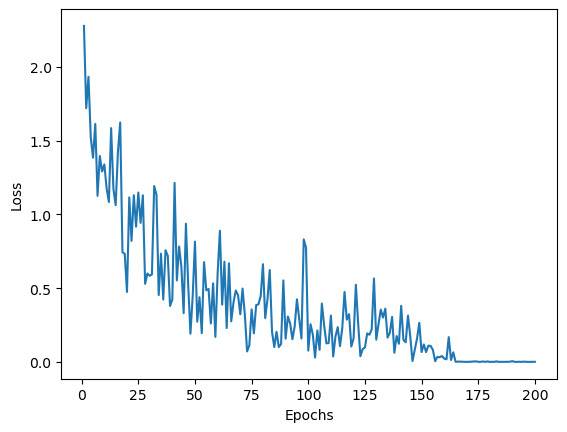

In [20]:
losses = []
epochs_lst = [i+1 for i in range(epochs)]

for epoch in tqdm(range(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if (i + 1) % 1000 == 0:
        # print("Epoch: ", epoch+1, "Step: ", i+1, "Loss: ", loss)
    print("Epoch:", epoch+1, "Loss:", loss.item())
    losses.append(float(loss))

MODEL_PATH = './cnn.mdl'
torch.save(model.state_dict(), MODEL_PATH)

plt.plot(epochs_lst, losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [21]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print("Accuracy: ", acc)

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy:  60.61
Accuracy of car: 67.0 %
Accuracy of plane: 72.4 %
Accuracy of bird: 46.9 %
Accuracy of cat: 41.8 %
Accuracy of deer: 53.8 %
Accuracy of dog: 51.4 %
Accuracy of frog: 68.8 %
Accuracy of horse: 64.9 %
Accuracy of ship: 74.4 %
Accuracy of truck: 64.7 %
